In [14]:
from tensorflow.keras.layers import Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline 
import numpy as np

In [2]:
path="C:/Users/busra/veri_manipulasyonu1/TRAIN_IMAGE"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='rgb',
    image_size=(224, 224),
    batch_size=64, 
    shuffle=True)

Found 32249 files belonging to 5 classes.


In [4]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [5]:
for image, label in train_ds.take(1):
    print(label)


tf.Tensor(
[0 0 0 0 2 0 0 0 2 1 0 2 2 1 0 0 0 0 1 0 4 2 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0
 4 3 0 1 0 0 2 0 0 4 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0], shape=(64,), dtype=int32)


In [6]:
train_ds.class_names

['0', '1', '2', '3', '4']

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='rgb',
    validation_split=0.2,
    subset="training",
    image_size=(224, 224),
    batch_size=64)

Found 32249 files belonging to 5 classes.
Using 25800 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='rgb',
    validation_split=0.2,
    subset="validation",
    image_size=(224, 224),
    batch_size=64)

Found 32249 files belonging to 5 classes.
Using 6449 files for validation.


In [9]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [10]:
val_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

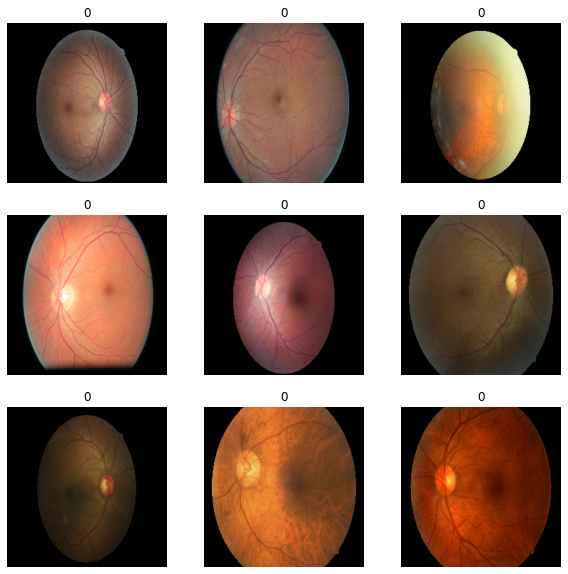

In [11]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")

In [33]:
model = Sequential()
model.add(ResNet101V2 (include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"))
model.add(Flatten())
model.add(Dense(512, activation='softmax'))
model.add(Dense(5, activation = 'softmax'))

model.layers[0].trainable = False
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 1000)              44675560  
_________________________________________________________________
flatten_3 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 2565      
Total params: 45,190,637
Trainable params: 515,077
Non-trainable params: 44,675,560
_________________________________________________________________


In [34]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho = 0.9, epsilon=1e-08,decay=0.0),
            loss='sparse_categorical_crossentropy', metrics=['acc'])

In [35]:
history = model.fit( train_ds, epochs=5, batch_size=128,validation_data=val_ds)

Epoch 1/5
404/404 [==============================] - 7584s 19s/step - loss: 1.4112 - acc: 0.7152 - val_loss: 1.0083 - val_acc: 0.7302
Epoch 2/5
404/404 [==============================] - 5403s 13s/step - loss: 0.9638 - acc: 0.7268 - val_loss: 0.8843 - val_acc: 0.7302
Epoch 3/5
404/404 [==============================] - 5578s 14s/step - loss: 0.8886 - acc: 0.7262 - val_loss: 0.8759 - val_acc: 0.7302
Epoch 4/5
404/404 [==============================] - 4745s 12s/step - loss: 0.8850 - acc: 0.7258 - val_loss: 0.8749 - val_acc: 0.7302
Epoch 5/5
404/404 [==============================] - 4248s 10s/step - loss: 0.8846 - acc: 0.7258 - val_loss: 0.8746 - val_acc: 0.7302


101/101 - 998s - loss: 0.8746 - acc: 0.7302


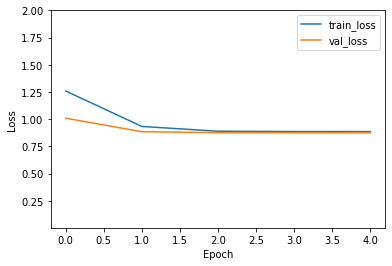

In [45]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.001, 2])
plt.legend(loc=0)

test_loss, test_acc = model.evaluate(val_ds, verbose=2)